## Trabalho Prático - Python para Ciência de Dados

IFMG - Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais - Especialização em Inteligência Artificial  

Mat.: Python para Ciência de Dados 

Prof.: Rodrigo Silva 

Aluno: Christhian da S. Gonçalves 

## 01. Sobre o conjunto de dados

O conjunto principal é uma versão atualizada do conjunto de dados da Califórnia de 1990. Este conjunto de dados foi relatado pela primeira vez no artigo: Sparse Spatial Autoregressions de Pace, R. Kelley e Ronald Barry. Os autores usaram os dados do Censo de 1990. O conjunto de dados atualizado contém os dados coletados pelo American Community Survey de 5 anos do US Census Bureau (2009 - 2020) no nível do grupo de quarteirões.

Grupos de Blocos (BGs) são divisões estatísticas de setores censitários, geralmente definidos para conter entre 600 e 3.000 pessoas, e são usados ​​para apresentar dados e controlar a numeração dos blocos. As variáveis ​​escolhidas dentro de cada grupo de quarteirões são: população, domicílios, total de cômodos, total de dormitórios, valor médio das casas, faixas de renda e faixas etárias das estruturas habitacionais. As variáveis ​​são recuperadas em nível de estado, município, área e grupo de quarteirões.

Link: https://www.kaggle.com/datasets/ebelmagnin/housing?select=california_housing_updated.csv

O conjunto de dados secundário é relacionado a taxas de criminalidade e nos dados de empregos policiais no estado da Califórnia.

Link: https://www.kaggle.com/datasets/fbi-us/california-crime

## 02. Análise Exploratória dos Dados

### 2.1 Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import BinaryEncoder
import time

from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors


### 2.2 Carregando base de dados

In [2]:
df_house = pd.read_csv("https://raw.githubusercontent.com/christhiangoncalves/Calculo_de_Preco_Casas_California/main/california_housing_updated.csv")
df_crime = pd.read_csv("https://raw.githubusercontent.com/christhiangoncalves/Calculo_de_Preco_Casas_California/main/ca_offenses_by_county.csv")

### 2.3 Análise dos dados

##### 2.3.1 Dados de 'df_house'

In [3]:
display(df_house.info(),'df_house.head()',df_house.head(),'df_house.isna().mean()',df_house.isna().mean(),'df_house.describe()',df_house.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25591 entries, 0 to 25590
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      25591 non-null  object 
 1   total_population          25591 non-null  float64
 2   total_households          25591 non-null  float64
 3   average_household_income  25591 non-null  float64
 4   average_house_age         25591 non-null  float64
 5   total_rooms               25557 non-null  float64
 6   total_bedrooms            25591 non-null  float64
 7   median_house_value        25591 non-null  float64
 8   longitude                 25591 non-null  float64
 9   latitude                  25591 non-null  float64
 10  ocean_proximity           25591 non-null  object 
dtypes: float64(9), object(2)
memory usage: 2.1+ MB


None

'df_house.head()'

,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
0,Alameda County,1713.0,644.0,150520.19,23.5,5300.0,723.0,1633100.0,-122.2344,37.8681,<1H OCEAN
1,Alameda County,1322.0,630.0,167222.22,16.7,4535.0,688.0,1126800.0,-122.2222,37.8587,NEAR BAY
2,Alameda County,940.0,417.0,171948.44,43.0,2800.0,429.0,1646200.0,-122.2480,37.8503,<1H OCEAN
3,Alameda County,1043.0,413.0,150914.04,38.6,2277.0,427.0,1418800.0,-122.2517,37.8457,NEAR BAY
4,Alameda County,1206.0,423.0,167677.30,36.9,2583.0,463.0,1447400.0,-122.2480,37.8450,<1H OCEAN


'df_house.isna().mean()'

name                        0.000000
total_population            0.000000
total_households            0.000000
average_household_income    0.000000
average_house_age           0.000000
total_rooms                 0.001329
total_bedrooms              0.000000
median_house_value          0.000000
longitude                   0.000000
latitude                    0.000000
ocean_proximity             0.000000
dtype: float64

'df_house.describe()'

,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude
count,25591.000000,25591.000000,25591.000000,25591.000000,2.555700e+04,25591.000000,2.559100e+04,25591.000000,25591.000000
mean,1537.494549,512.020398,92004.845269,26.505346,-3.388202e+06,555.310265,-6.236765e+07,-119.487318,35.535162
std,778.122087,234.890550,34058.549719,7.771489,4.742731e+07,255.106035,1.951191e+08,1.957278,2.078309
min,0.000000,0.000000,0.000000,0.000000,-6.666667e+08,0.000000,-6.666667e+08,-124.163400,32.545900
25%,1009.000000,348.000000,66177.610000,21.600000,1.908000e+03,376.000000,2.984000e+05,-121.640100,33.931000
50%,1421.000000,475.000000,89021.440000,26.900000,2.639000e+03,514.000000,4.814000e+05,-118.591100,34.260900
75%,1940.000000,640.500000,115609.600000,32.100000,3.634000e+03,694.000000,7.351500e+05,-117.950950,37.680550
max,39373.000000,7133.000000,212500.000000,45.500000,4.649700e+04,7960.000000,2.000001e+06,-114.346700,41.746200


In [4]:
#Verificando linhas da coluna total_rooms que possui valores negativos
df_house[df_house['total_rooms'] < 0]


,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
302,Alameda County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-117.7864,34.0530,INLAND
336,Alameda County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-122.1425,37.7528,<1H OCEAN
495,Alameda County,75.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-122.2465,37.7789,NEAR BAY
879,Alameda County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-121.9437,37.5089,NEAR OCEAN
904,Alameda County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-121.9713,37.5610,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
24919,Tuolumne County,2375.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-120.5392,37.8936,INLAND
24994,Ventura County,814.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-119.2107,34.2693,NEAR OCEAN
25070,Ventura County,0.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-119.4044,34.0102,ISLAND
25397,Ventura County,124.0,0.0,0.0,0.0,-666666666.0,0.0,-666666666.0,-119.5145,33.2499,ISLAND


In [5]:
#median_house_value com valores negativos e e demais colunas com dados consistentes
df_house[df_house['median_house_value'] < 0]



,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
28,Alameda County,653.0,272.0,89209.56,40.6,1595.0,368.0,-666666666.0,-122.2692,37.8300,<1H OCEAN
29,Alameda County,1253.0,398.0,89158.29,38.0,2085.0,430.0,-666666666.0,-122.2754,37.8271,NEAR BAY
39,Alameda County,1462.0,738.0,65250.68,31.4,1798.0,753.0,-666666666.0,-122.2705,37.8153,NEAR BAY
43,Alameda County,872.0,261.0,79952.11,41.0,1331.0,315.0,-666666666.0,-122.2732,37.8174,NEAR BAY
60,Alameda County,655.0,272.0,26231.62,25.8,889.0,294.0,-666666666.0,-122.2862,37.8034,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
25573,Yuba County,575.0,247.0,55435.22,25.8,1159.0,247.0,-666666666.0,-121.3704,39.0317,INLAND
25577,Yuba County,71.0,18.0,73333.33,18.1,91.0,18.0,-666666666.0,-121.3495,39.0898,INLAND
25578,Yuba County,558.0,70.0,95428.57,4.9,476.0,70.0,-666666666.0,-121.3596,39.1074,INLAND
25579,Yuba County,646.0,228.0,54320.18,12.7,1425.0,253.0,-666666666.0,-121.3307,39.1092,INLAND


*OBS*: Filtrando numeros negativos em 'total_rooms' é possível verificar que as demais colunas estão com dados nulos, com isso, estas 130 linhas foram excluidas da base de dados.
Filtrando os números negativos da coluna 'median_house_value',verifica-se que pode ter havido um erro na imputação dos dados. com isso optou-se por substituir valores incorretos pela média da categoria que a linha pertence.

In [6]:
#Excluindo linhas apartir da coluna total_rooms
df_house = df_house.drop(df_house[df_house['total_rooms'] < 0].index)

#substituir os números negativos da coluna 'median_house_value', pela média da categoria que a linha pertence
df_house_temp = df_house.drop(df_house[df_house['median_house_value'] < 0].index)
df_house_temp = df_house_temp.groupby('name')['median_house_value'].mean()
#df_house_temp = df_house_temp.set_index('name')['median_house_value'] 

#Função para substituir os números negativos pela média da categoria
def subst_negat(median_house_value, name):
    return median_house_value if median_house_value >= 0 else df_house_temp[name]

# Substituir os números negativos pela média da categoria usando a função map
df_house['median_house_value'] = df_house.apply(lambda row: subst_negat(row['median_house_value'], row['name']), axis=1)

df_house_temp.reset_index()
#verificando resultado
df_house.merge(df_house_temp, on='median_house_value')



,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
0,Alameda County,653.0,272.0,89209.56,40.6,1595.0,368.0,819936.834302,-122.2692,37.8300,<1H OCEAN
1,Alameda County,1253.0,398.0,89158.29,38.0,2085.0,430.0,819936.834302,-122.2754,37.8271,NEAR BAY
2,Alameda County,1462.0,738.0,65250.68,31.4,1798.0,753.0,819936.834302,-122.2705,37.8153,NEAR BAY
3,Alameda County,872.0,261.0,79952.11,41.0,1331.0,315.0,819936.834302,-122.2732,37.8174,NEAR BAY
4,Alameda County,655.0,272.0,26231.62,25.8,889.0,294.0,819936.834302,-122.2862,37.8034,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
2286,Yuba County,575.0,247.0,55435.22,25.8,1159.0,247.0,256866.000000,-121.3704,39.0317,INLAND
2287,Yuba County,71.0,18.0,73333.33,18.1,91.0,18.0,256866.000000,-121.3495,39.0898,INLAND
2288,Yuba County,558.0,70.0,95428.57,4.9,476.0,70.0,256866.000000,-121.3596,39.1074,INLAND
2289,Yuba County,646.0,228.0,54320.18,12.7,1425.0,253.0,256866.000000,-121.3307,39.1092,INLAND


In [7]:
df_house[df_house['total_households'] <= 0]

,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
3971,Lassen County,8193.0,0.0,0.0,24.2,NaN,24.0,205427.272727,-121.5733,39.1183,INLAND
18009,San Diego County,3443.0,0.0,0.0,30.5,NaN,11.0,636838.718019,-117.1990,32.7398,NEAR OCEAN
21882,Santa Barbara County,13.0,0.0,0.0,16.7,29.0,17.0,770377.379182,-119.9233,33.9806,ISLAND
24906,Tuolumne County,45.0,0.0,0.0,40.4,311.0,91.0,327738.775510,-119.5269,37.9444,INLAND


In [8]:

df_house[df_house.isnull().any(axis=1)].head()

,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
467,Alameda County,11.0,5.0,87500.00,40.5,NaN,5.0,819936.834302,-122.3016,37.8380,NEAR BAY
3007,Humboldt County,991.0,15.0,87500.00,25.5,NaN,15.0,342343.925234,-119.2917,34.4475,INLAND
3971,Lassen County,8193.0,0.0,0.00,24.2,NaN,24.0,205427.272727,-121.5733,39.1183,INLAND
6997,Los Angeles County,2056.0,4.0,162500.00,5.5,NaN,4.0,697117.685414,-117.8169,34.0574,INLAND
9305,Los Angeles County,260.0,11.0,106136.36,34.1,NaN,11.0,697117.685414,-118.1994,33.7860,<1H OCEAN


In [9]:
#Eliminando linhas total_households com dados faltantes
df_house = df_house.drop(df_house[df_house['total_households'] <= 0].index)

temp = df_house.drop(df_house[df_house['total_rooms'] < 0].index)
temp = temp.groupby('name')['total_rooms'].mean()
#df_house_temp = df_house_temp.set_index('name')['median_house_value'] 

#Função para substituir os números negativos pela média da categoria
def subst_negat(median_house_value, name):
    return median_house_value if median_house_value >= 0 else temp[name]

# Substituir os números negativos pela média da categoria usando a função map
df_house['total_rooms'] = df_house.apply(lambda row: subst_negat(row['total_rooms'], row['name']), axis=1)


df_house = df_house.drop(df_house[df_house['total_rooms'] <= 0].index)

temp.reset_index()
#verificando resultado
df_house.merge(temp, on='total_rooms').head()


,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity
0,Alameda County,11.0,5.0,87500.00,40.5,2724.664889,5.0,819936.834302,-122.3016,37.8380,NEAR BAY
1,Alpine County,1159.0,397.0,90925.69,22.4,8006.000000,1794.0,372500.000000,-120.1317,39.5629,INLAND
2,Sacramento County,3537.0,1155.0,114491.34,11.7,8006.000000,1155.0,387300.000000,-117.3114,34.0530,INLAND
3,Humboldt County,991.0,15.0,87500.00,25.5,2820.132743,15.0,342343.925234,-119.2917,34.4475,INLAND
4,Los Angeles County,2056.0,4.0,162500.00,5.5,2606.779731,4.0,697117.685414,-117.8169,34.0574,INLAND


In [10]:
#Transformando categoria de poxmidade do oceano em colunas

ocean_prox = pd.get_dummies(df_house['ocean_proximity'])
df_house = pd.concat([df_house,ocean_prox],axis=1)

df_house


,name,total_population,total_households,average_household_income,average_house_age,total_rooms,total_bedrooms,median_house_value,longitude,latitude,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,Alameda County,1713.0,644.0,150520.19,23.5,5300.0,723.0,1633100.0,-122.2344,37.8681,<1H OCEAN,True,False,False,False,False
1,Alameda County,1322.0,630.0,167222.22,16.7,4535.0,688.0,1126800.0,-122.2222,37.8587,NEAR BAY,False,False,False,True,False
2,Alameda County,940.0,417.0,171948.44,43.0,2800.0,429.0,1646200.0,-122.2480,37.8503,<1H OCEAN,True,False,False,False,False
3,Alameda County,1043.0,413.0,150914.04,38.6,2277.0,427.0,1418800.0,-122.2517,37.8457,NEAR BAY,False,False,False,True,False
4,Alameda County,1206.0,423.0,167677.30,36.9,2583.0,463.0,1447400.0,-122.2480,37.8450,<1H OCEAN,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25586,Yuba County,1135.0,565.0,86305.31,21.2,3880.0,590.0,496500.0,-121.3437,39.2926,INLAND,False,True,False,False,False
25587,Yuba County,841.0,371.0,62109.16,23.9,2603.0,590.0,215500.0,-121.1380,39.4516,INLAND,False,True,False,False,False
25588,Yuba County,953.0,378.0,44841.27,24.6,2301.0,425.0,246800.0,-121.3199,39.4271,INLAND,False,True,False,False,False
25589,Yuba County,957.0,447.0,64781.88,29.1,3568.0,594.0,266700.0,-121.2128,39.4224,INLAND,False,True,False,False,False


Como temos valores de preço das casas dispostos como uma média, é realizado a média do total de comodos por familia e a média da renda por familia.

In [11]:
#Para normalizar os dados é realizado a média de comodos por familia/casa
df_house['median_rooms'] = df_house['total_rooms'] /df_house['total_households']
#Para normalizar os dados é realizado a média de quartos por familia/casa
df_house['median_bedrooms'] = df_house['total_bedrooms'] /df_house['total_households']
#Para normalizar os dados é realizado a média da renda familiar por pessoa
df_house['median_income'] = df_house['average_household_income'] /df_house['total_population']
#Excluir colunas não relevantes
del df_house['total_rooms'] 
del df_house['total_bedrooms'] 
del df_house['average_household_income'] 
del df_house['ocean_proximity'] 
df_house

,name,total_population,total_households,average_house_age,median_house_value,longitude,latitude,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,median_bedrooms,median_income
0,Alameda County,1713.0,644.0,23.5,1633100.0,-122.2344,37.8681,True,False,False,False,False,8.229814,1.122671,87.869346
1,Alameda County,1322.0,630.0,16.7,1126800.0,-122.2222,37.8587,False,False,False,True,False,7.198413,1.092063,126.491846
2,Alameda County,940.0,417.0,43.0,1646200.0,-122.2480,37.8503,True,False,False,False,False,6.714628,1.028777,182.923872
3,Alameda County,1043.0,413.0,38.6,1418800.0,-122.2517,37.8457,False,False,False,True,False,5.513317,1.033898,144.692272
4,Alameda County,1206.0,423.0,36.9,1447400.0,-122.2480,37.8450,True,False,False,False,False,6.106383,1.094563,139.035904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25586,Yuba County,1135.0,565.0,21.2,496500.0,-121.3437,39.2926,False,True,False,False,False,6.867257,1.044248,76.039921
25587,Yuba County,841.0,371.0,23.9,215500.0,-121.1380,39.4516,False,True,False,False,False,7.016173,1.590296,73.851558
25588,Yuba County,953.0,378.0,24.6,246800.0,-121.3199,39.4271,False,True,False,False,False,6.087302,1.124339,47.052749
25589,Yuba County,957.0,447.0,29.1,266700.0,-121.2128,39.4224,False,True,False,False,False,7.982103,1.328859,67.692665


In [12]:
#Realizado o tratamento das colunas do nome da cidade para realizar o merge de forma correta
df_house['name'] = df_house['name'].str.replace(' County', '')


##### 2.3.2 Dados de 'df_crime'

In [13]:
display(df_crime.info(),'df_crime.head()',df_crime.head(),'df_crime.isna().mean',df_crime.isna().mean(),'df_crimey.describe()',df_crime.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Metropolitan/Nonmetropolitan          58 non-null     object 
 1   County                                58 non-null     object 
 2   Violent crime                         58 non-null     object 
 3   Murder and nonnegligent manslaughter  58 non-null     float64
 4   Rape (revised definition)             58 non-null     float64
 5   Rape(legacy definition)               0 non-null      float64
 6   Robbery                               58 non-null     object 
 7   Aggravated assault                    58 non-null     object 
 8   Property crime                        58 non-null     object 
 9   Burglary                              58 non-null     object 
 10  Larceny-theft                         58 non-null     object 
 11  Motor vehicle theft  

None

'df_crime.head()'

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape(legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510,6.0,13.0,NaN,177,314,"2,077",463,985,629,11.0
1,Metropolitan Counties,Butte3,155,4.0,20.0,NaN,14,117,"1,422",708,693,21,0.0
2,Metropolitan Counties,Contra Costa,426,14.0,24.0,NaN,153,235,"2,013",660,"1,332",21,18.0
3,Metropolitan Counties,El Dorado3,252,9.0,46.0,NaN,32,165,"2,031",577,"1,412",42,4.0
4,Metropolitan Counties,Fresno,962,8.0,32.0,NaN,112,810,"3,810","1,398","1,838",574,145.0


'df_crime.isna().mean'

Metropolitan/Nonmetropolitan            0.0
County                                  0.0
Violent crime                           0.0
Murder and nonnegligent manslaughter    0.0
Rape (revised definition)               0.0
Rape(legacy definition)                 1.0
Robbery                                 0.0
Aggravated assault                      0.0
Property crime                          0.0
Burglary                                0.0
Larceny-theft                           0.0
Motor vehicle theft                     0.0
Arson                                   0.0
dtype: float64

'df_crimey.describe()'

,Murder and nonnegligent manslaughter,Rape (revised definition),Rape(legacy definition),Arson
count,58.000000,58.000000,0.0,58.000000
mean,7.413793,37.758621,NaN,24.862069
std,15.440928,63.961422,NaN,60.325273
min,0.000000,0.000000,NaN,0.000000
25%,1.000000,7.000000,NaN,0.250000
50%,3.000000,18.000000,NaN,7.500000
75%,6.000000,34.250000,NaN,15.000000
max,98.000000,344.000000,NaN,300.000000


In [14]:
#deletando coluna nula
del df_crime['Rape(legacy definition)'] 
df_crime

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510,6.0,13.0,177,314,"2,077",463,985,629,11.0
1,Metropolitan Counties,Butte3,155,4.0,20.0,14,117,"1,422",708,693,21,0.0
2,Metropolitan Counties,Contra Costa,426,14.0,24.0,153,235,"2,013",660,"1,332",21,18.0
3,Metropolitan Counties,El Dorado3,252,9.0,46.0,32,165,"2,031",577,"1,412",42,4.0
4,Metropolitan Counties,Fresno,962,8.0,32.0,112,810,"3,810","1,398","1,838",574,145.0
5,Metropolitan Counties,Imperial3,219,0.0,6.0,7,206,625,202,395,28,21.0
6,Metropolitan Counties,Kern,"2,235",31.0,157.0,360,"1,687","9,903","3,243","4,777","1,883",300.0
7,Metropolitan Counties,Kings3,122,2.0,16.0,9,95,470,193,265,12,5.0
8,Metropolitan Counties,Los Angeles,"5,173",98.0,304.0,"1,212","3,559","16,301","3,739","8,359","4,203",215.0
9,Metropolitan Counties,Madera,334,1.0,18.0,26,289,"1,252",556,686,10,4.0


In [15]:
#Corriginodo dados: Coluna de County com valores que deveriam estar na coluna seguinte, provável erro de imputação de dados onde faltou virgula para separar
#                   nome do condado do numero em milhar que é separado por virgula e aspas duplas na base de dados em CSV.
import re
def corrigir_linha (row):
    County = row['County']
    Violent_crime = row['Violent crime']

    match = re.match(r'(\D+)(\d+)', County)# Procura por um ou mais caracteres não numéricos seguidos por um ou mais dígitos numéricos
    if match:

        row['County'] = match.group(1)
        row['Violent crime'] = (match.group(2)) + Violent_crime 
    return row

# Aplicar a função de correção na coluna 'County' e 'Violent crime'
df_crime = df_crime.apply(corrigir_linha, axis=1)

df_crime = df_crime.sort_values(by='County') #Organiza linhas em ordem alfabetica em função do coluna County
df_crime.head()

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510,6.0,13.0,177,314,"2,077",463,985,629,11.0
37,Nonmetropolitan Counties,Alpine,39,0.0,0.0,0,9,35,15,19,1,0.0
38,Nonmetropolitan Counties,Amador,350,1.0,2.0,5,42,340,130,205,5,1.0
1,Metropolitan Counties,Butte,3155,4.0,20.0,14,117,"1,422",708,693,21,0.0
39,Nonmetropolitan Counties,Calaveras,3111,6.0,24.0,8,73,656,251,386,19,0.0


In [16]:
#retirando a virgula que separa a casa de milhar dos dados
df_crime = df_crime.replace(',','', regex=True)
#transformando dados das colunas em numeros inteiros
col = ['Violent crime','Murder and nonnegligent manslaughter', 'Rape (revised definition)',
        'Robbery', 'Aggravated assault','Property crime', 'Burglary',
        'Larceny-theft', 'Motor vehicle theft','Arson']
df_crime[col] = df_crime[col].astype(int)
#somando linha a linha valores das colunas selecionadas na variável col
df_crime['total_crime'] = df_crime[col].sum(axis=1)
df_crime.head()

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson,total_crime
0,Metropolitan Counties,Alameda,510,6,13,177,314,2077,463,985,629,11,5185
37,Nonmetropolitan Counties,Alpine,39,0,0,0,9,35,15,19,1,0,118
38,Nonmetropolitan Counties,Amador,350,1,2,5,42,340,130,205,5,1,1081
1,Metropolitan Counties,Butte,3155,4,20,14,117,1422,708,693,21,0,6154
39,Nonmetropolitan Counties,Calaveras,3111,6,24,8,73,656,251,386,19,0,4534


## 03. Fusão das Bases de Dados

In [17]:
#Realizado o agrupamento da população em df_house para agrupar e calcular o percentual de crimes por população
df_temp = df_house.groupby('name')['total_population'].sum().reset_index()
df_temp = pd.merge(df_crime,df_temp, left_on='County',right_on='name', how='left')
df_crime_select = df_temp[['County','total_crime']]
df_crime_select.head()

,County,total_crime
0,Alameda,5185
1,Alpine,118
2,Amador,1081
3,Butte,6154
4,Calaveras,4534


In [18]:
#Realizando o merge dos dataframes df_house, df_crime_select
df_merged_h_c = pd.merge(df_house, df_crime_select, left_on='name',right_on='County', how='left')

#escluindo colunas categoricas
df_merged_h_c = df_merged_h_c.drop(columns=['name','County',])

df_merged_h_c.isna().mean()

#df = df_merged_h_c[df_merged_h_c.isnull().any(axis=1)]
#df.groupby('name').size().reset_index()
#df_merged_h_c.groupby('name')['total_population'].sum().reset_index()

total_population      0.0
total_households      0.0
average_house_age     0.0
median_house_value    0.0
longitude             0.0
latitude              0.0
<1H OCEAN             0.0
INLAND                0.0
ISLAND                0.0
NEAR BAY              0.0
NEAR OCEAN            0.0
median_rooms          0.0
median_bedrooms       0.0
median_income         0.0
total_crime           0.0
dtype: float64

## 04. Analise Grafica dos Dados

In [24]:
plot1 = ['median_house_value','total_population', 'total_households', 'average_house_age']
plot2 = ['median_house_value','<1H OCEAN', 'INLAND','ISLAND', 'NEAR BAY', 'NEAR OCEAN']
plot3 = ['median_house_value', 'median_rooms', 'median_bedrooms','median_income', 'total_crime']

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


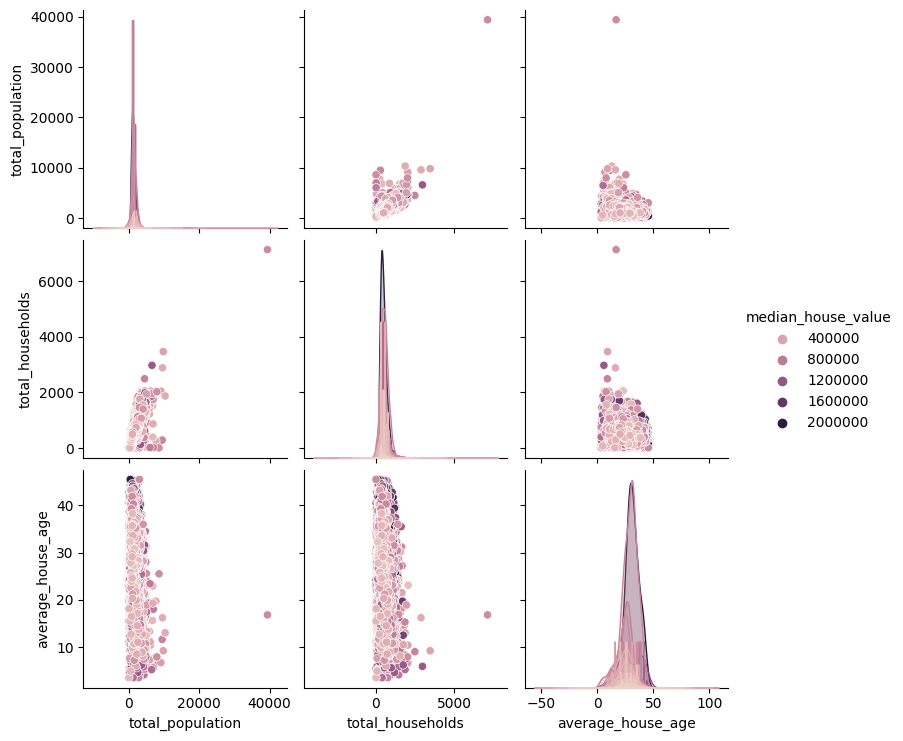

In [20]:


sns.pairplot(df_merged_h_c[plot1 ],hue= 'median_house_value')


c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


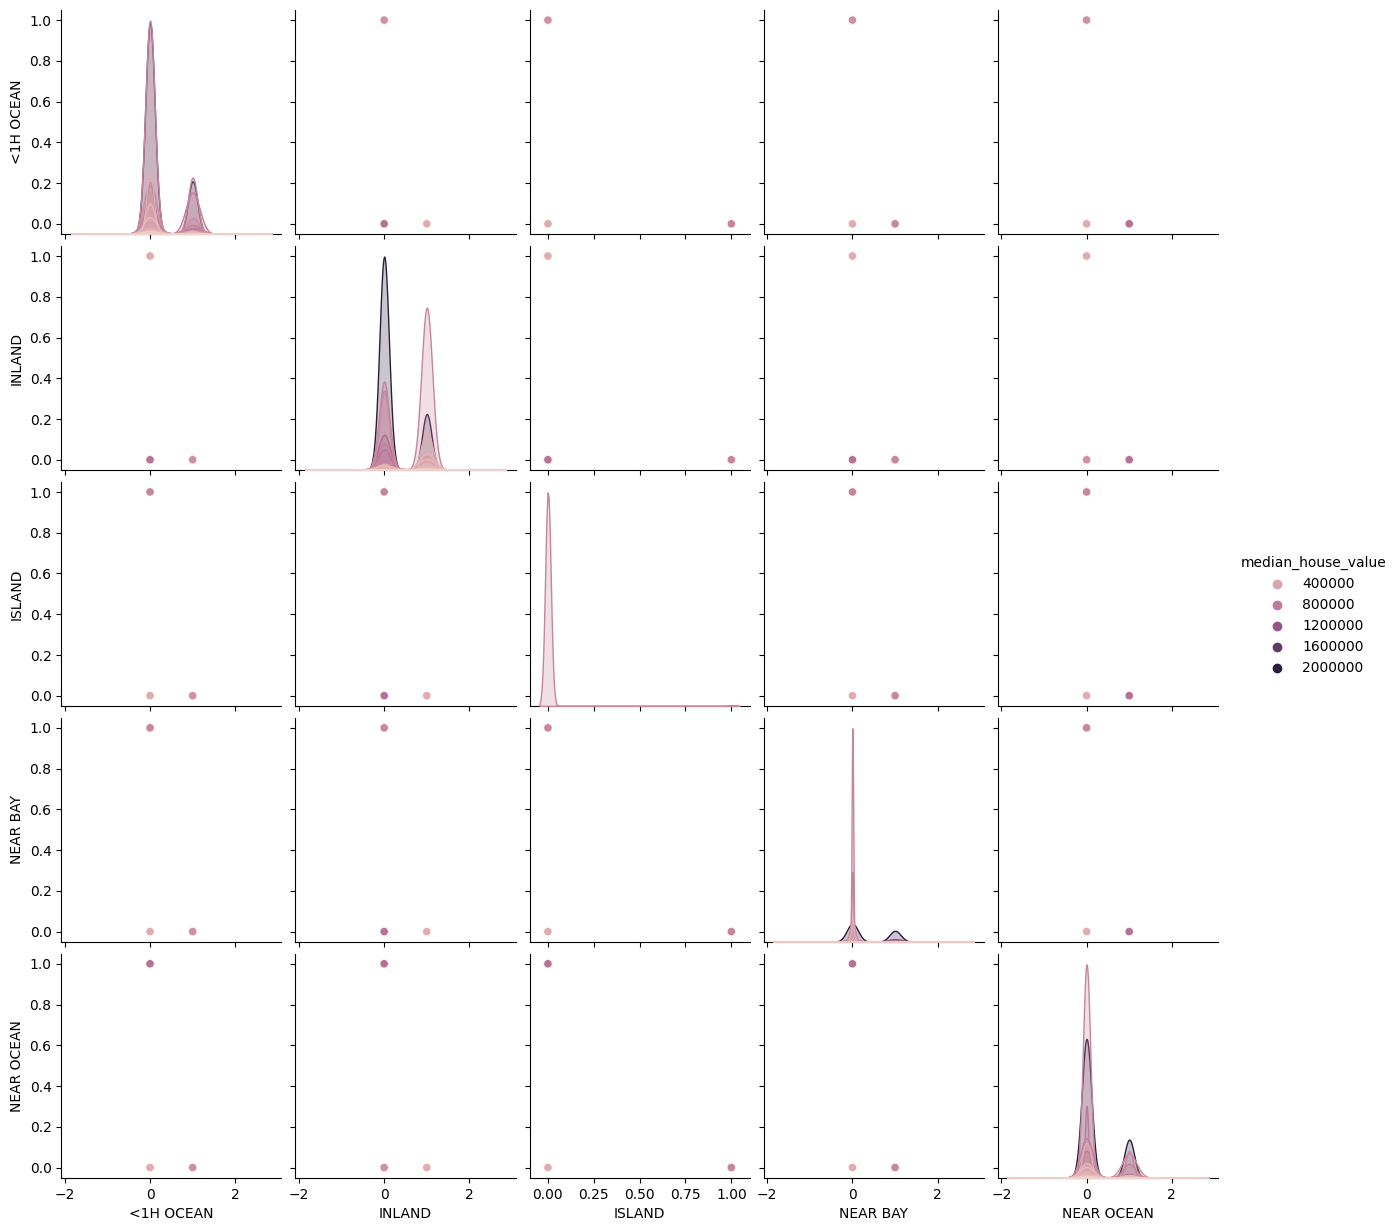

In [21]:
sns.pairplot(df_merged_h_c[plot2],hue= 'median_house_value')


c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


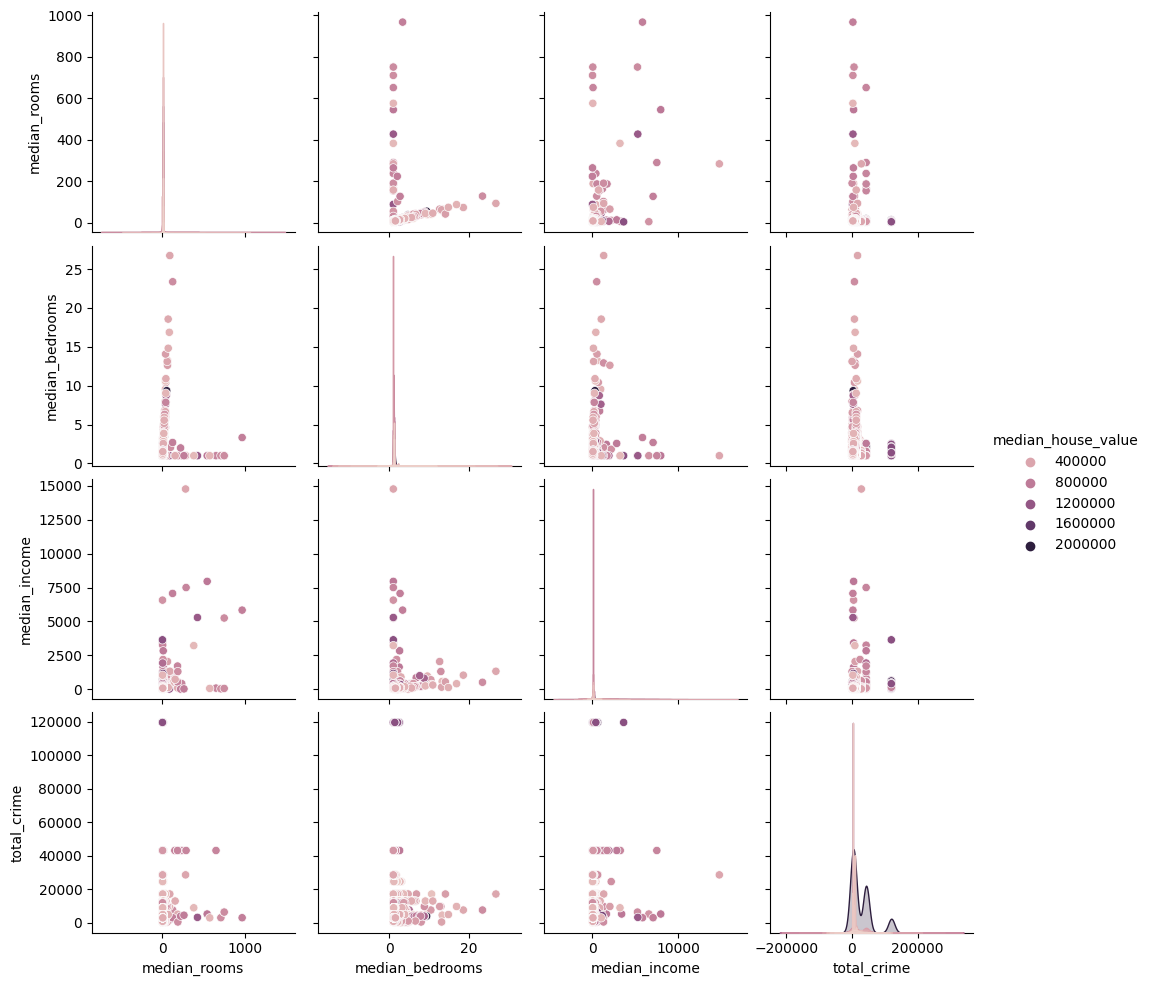

In [25]:
sns.pairplot(df_merged_h_c[plot3],hue= 'median_house_value')

<Axes: >

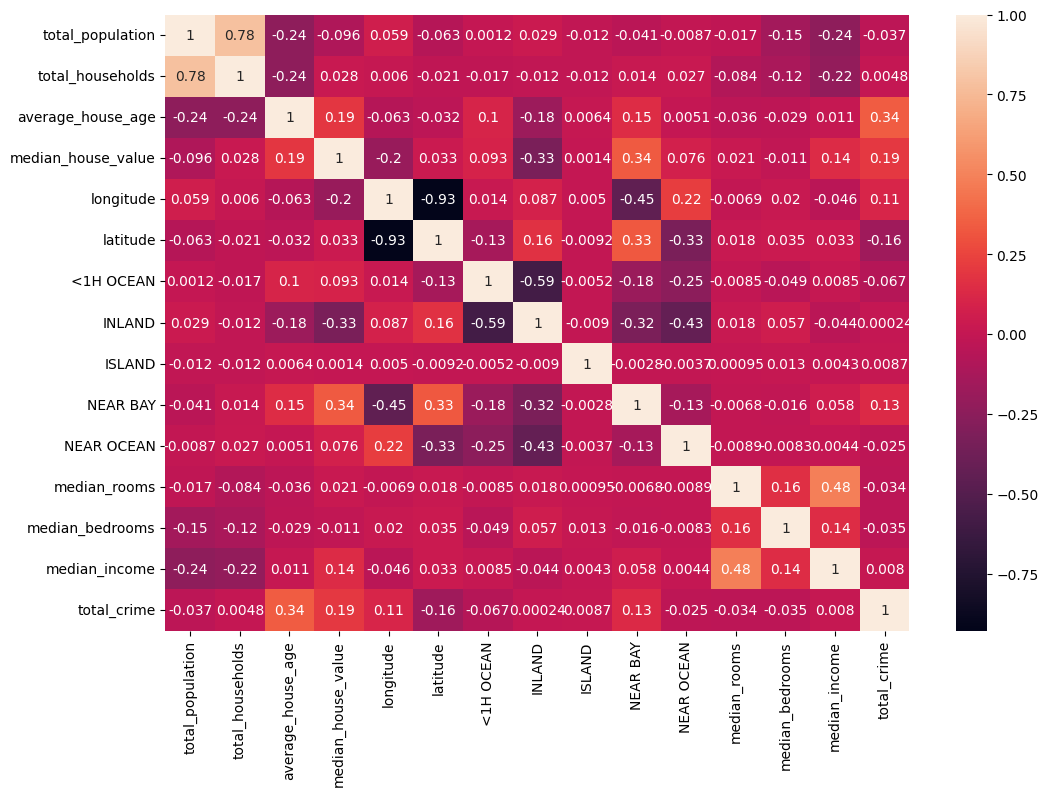

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df_merged_h_c.corr(),annot=True)

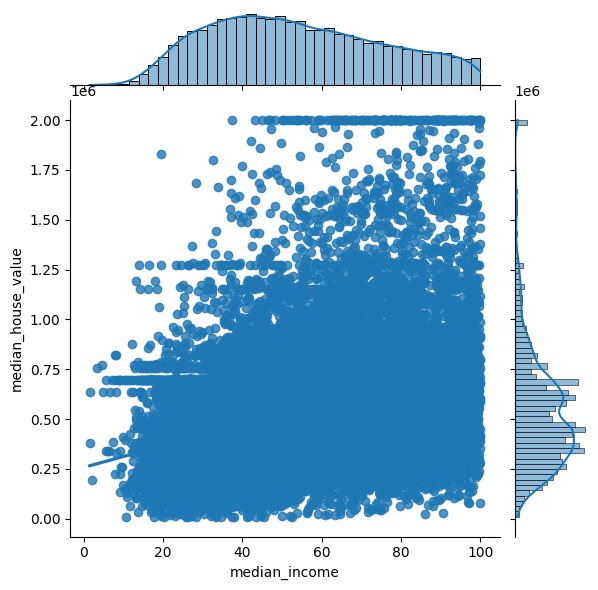

In [29]:
#retirando outlier provisoriamente para visualizar dados
df = df_merged_h_c.drop(df_merged_h_c[df_merged_h_c['median_income'] >= 100].index)
sns.jointplot(data=df,y='median_house_value',x='median_income',kind='reg')


*OBS*: 75% dos valores da base de dados tem valor de median_income até 94.1, quando definido o corte no valor de 100, é possível verificar a tendência do valor da casa aumentando a medida que aumenta a renda familiar.

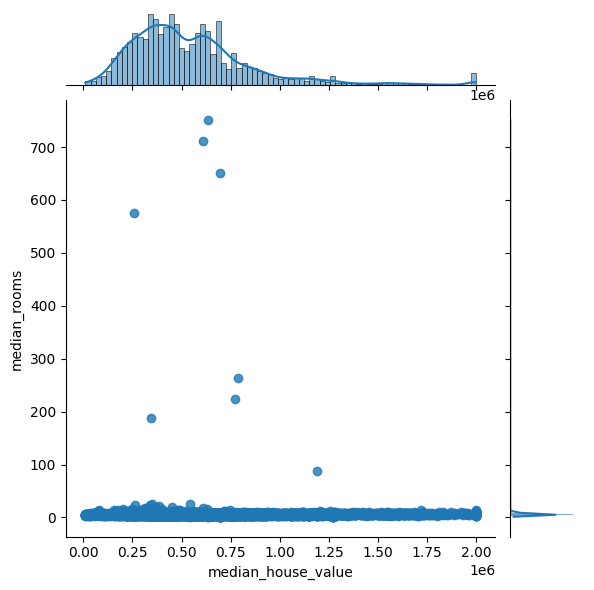

In [30]:

sns.jointplot(data=df,x='median_house_value',y='median_rooms',kind='reg')

*OBS*: Sem os outliers é possivel verificar a relação do preço da casa e a quatidade de comodos

In [ ]:
df_merged_h_c.plot(kind='scatter', x='longitude', y='latitude',alpha=0.4,c='median_house_value',cmap=plt.get_cmap("jet"))

In [ ]:
df_merged_h_c.plot(kind='scatter', x='longitude', y='latitude',alpha=0.4,c='violence_rate',cmap=plt.get_cmap("jet"))


## 05. Treinamento , Ajuste Fino e teste de modelo de aprendizado de Maquina

In [ ]:

replace = ['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN']
df_merged_h_c[replace] = df_merged_h_c[replace].replace({True: 1, False: 0})

df_merged_h_c

,total_population,total_households,average_house_age,median_house_value,longitude,latitude,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,median_bedrooms,median_income,total_crime
0,1713.0,644.0,23.5,1633100.0,-122.2344,37.8681,1,0,0,0,0,8.229814,1.122671,87.869346,5185
1,1322.0,630.0,16.7,1126800.0,-122.2222,37.8587,0,0,0,1,0,7.198413,1.092063,126.491846,5185
2,940.0,417.0,43.0,1646200.0,-122.2480,37.8503,1,0,0,0,0,6.714628,1.028777,182.923872,5185
3,1043.0,413.0,38.6,1418800.0,-122.2517,37.8457,0,0,0,1,0,5.513317,1.033898,144.692272,5185
4,1206.0,423.0,36.9,1447400.0,-122.2480,37.8450,1,0,0,0,0,6.106383,1.094563,139.035904,5185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25452,1135.0,565.0,21.2,496500.0,-121.3437,39.2926,0,1,0,0,0,6.867257,1.044248,76.039921,2911
25453,841.0,371.0,23.9,215500.0,-121.1380,39.4516,0,1,0,0,0,7.016173,1.590296,73.851558,2911
25454,953.0,378.0,24.6,246800.0,-121.3199,39.4271,0,1,0,0,0,6.087302,1.124339,47.052749,2911
25455,957.0,447.0,29.1,266700.0,-121.2128,39.4224,0,1,0,0,0,7.982103,1.328859,67.692665,2911


In [ ]:
#Definindo variáveis de treino e de teste
trein = df_merged_h_c.drop(df_merged_h_c[df_merged_h_c['median_rooms'] > 18].index)# retirando autliers

X = trein.drop(['median_house_value'],axis=1)
y = trein['median_house_value']#.round()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)


In [ ]:
display("total de dados: ",df_merged_h_c.shape,"Linhas de teste: ", X_test.shape,"Linhas de treino: ", X_train.shape)

'total de dados: '

(25457, 15)

'Linhas de teste: '

(5070, 14)

'Linhas de treino: '

(20279, 14)

In [ ]:
#Escalonando os dados para facilitar o treinamento com StandardScaler
""" sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(X_test,columns=X.columns)
y_train """

' sc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_train = pd.DataFrame(X_train,columns=X.columns)\nX_test = sc.fit_transform(X_test)\nX_test = pd.DataFrame(X_test,columns=X.columns)\ny_train '

### 5.1 Teste de Regrassão Linear

In [ ]:
#treino e teste do modelo de previsão
ins = LinearRegression()
ins.fit(X_train,y_train)
pred = ins.predict(X_test)
pred[:15]

array([692873.45673814,  74497.76592974, 490183.38144794, 844544.24176949,
       862135.42304139, 709384.38916192, 625035.40842839, 350557.61395963,
       448014.01857069, 718124.17228656, 425528.82065845, 652068.53605473,
       768111.33048258, 380790.74960392, 972939.62734334])

In [ ]:
#Resultados esperados da previsão
y_test[:15]

18316    6.457000e+05
17537    3.416878e+05
12441    9.081000e+05
13870    6.863000e+05
7830     1.153200e+06
18309    6.274000e+05
6888     5.947000e+05
16700    3.391000e+05
13701    4.795000e+05
8587     5.213000e+05
11706    4.176000e+05
24225    2.931000e+05
22209    6.479000e+05
17625    2.938000e+05
250      5.476000e+05
Name: median_house_value, dtype: float64

In [ ]:
#Resultado percentual de acerto na previsão
ins.score(X_test,y_test)

0.4107904898759447

In [ ]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))# Erro médio quadratico

RMSE 315078.11957715335


In [ ]:
#validação cruzada
cross = cross_val_score(ins,X_test,y_test,cv=10)
final = sum(cross) / len(cross)
final

0.39296052042924556

### 5.2 Arvore de descisão

In [ ]:
""" X = trein.drop(['median_house_value'],axis=1)
y = trein['median_house_value'].round()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100) """

params = [{'criterion':['mse','mae'],'max_depth':[None,2,4,8,15]}]


ins = DecisionTreeRegressor()
grid_search = GridSearchCV(ins,params,cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_
#ins.fit(X_train,y_train)
#pred = ins.predict(X_test)

ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'absolute_error', 'poisson', 'friedman_mse', 'squared_error'}. Got 'mse' instead.

--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'absolute_error', 'poisson', 'friedman_mse', 'squared_error'}. Got 'mae' instead.


In [ ]:
ins.score(X_test,y_test)

In [ ]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

In [ ]:
cross = cross_val_score(ins,X_test,y_test,cv=10)
final = sum(cross) / len(cross)
final

In [ ]:
clfs = [DecisionTreeRegressor(),
        RandomForestRegressor(),
        RandomForestRegressor(),
        RandomForestRegressor(),
        SVC(),
        KNeighborsRegressor()]

In [ ]:
from sklearn.model_selection import cross_val_score

classifiers = []
scores = []

for clf in clfs:
    cv_scores = cross_val_score(clf,X,y, cv=10, scoring='f1')
    for s in cv_scores:
        classifiers.append(str(clf))
        scores.append(float(s))

In [ ]:
results = pd.DataFrame({'classifier':classifiers,'F-score':scores})
results

In [ ]:
sns.set(rc={'figure.figsize':(25,8)})
sns.violinplot(data=results,x='classifier',y='F-score')